<a href="https://colab.research.google.com/github/manikanta741/Data-Science/blob/main/Netflix%20Content%20Analysis%20%20%26%20%20Visualization%20Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(5850, 15)
RangeIndex(start=0, stop=5850, step=1)
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2

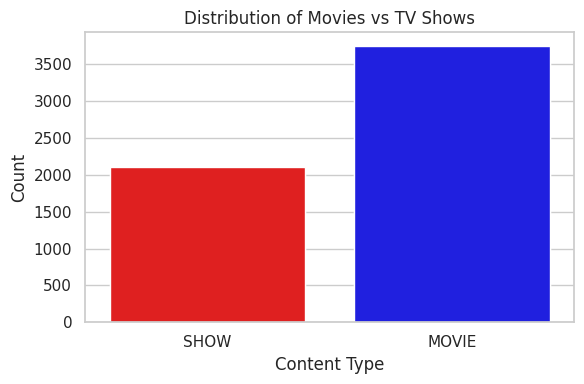

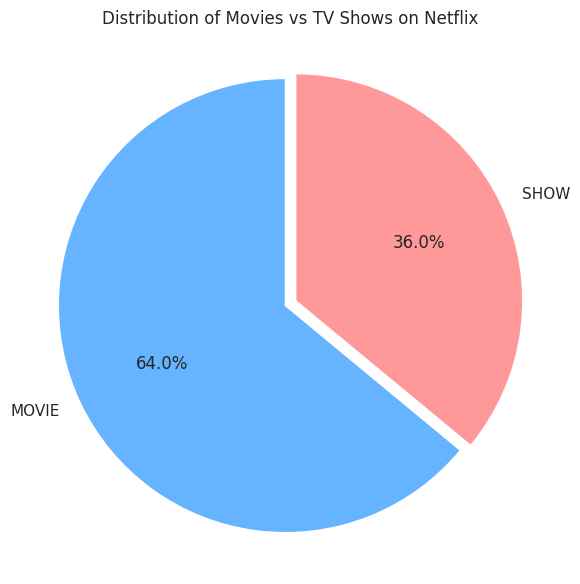

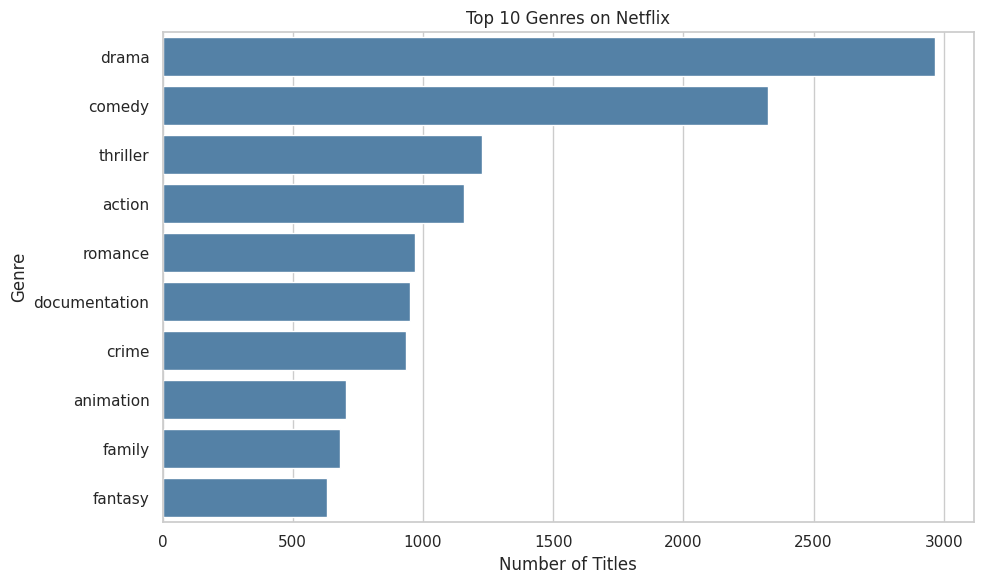

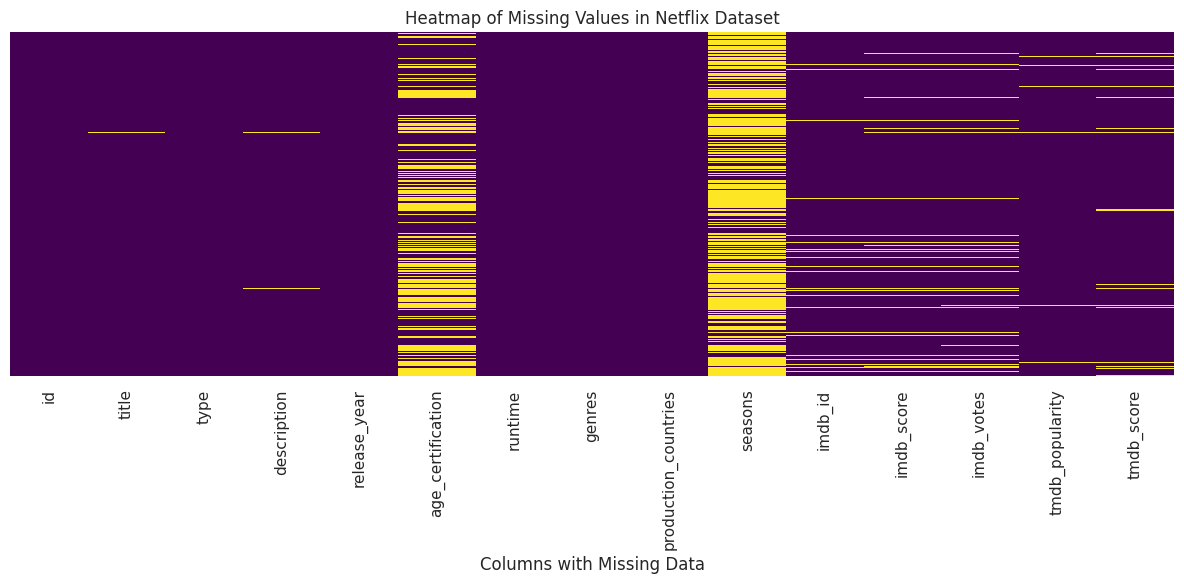

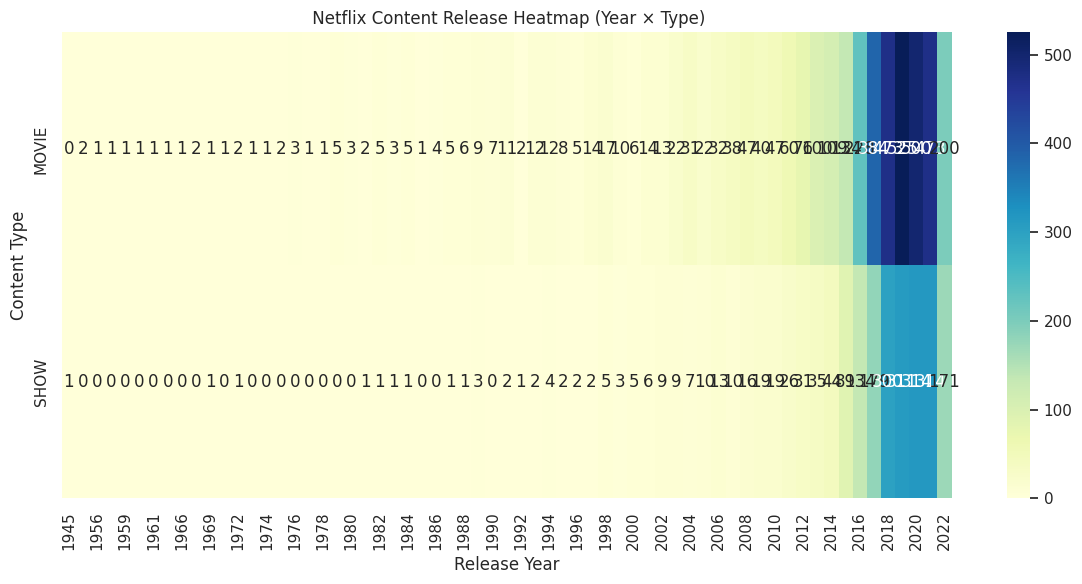

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from itertools import chain

# Load the dataset
df = pd.read_csv('/content/titles.csv')

# Preprocessing
df['genres'] = df['genres'].apply(lambda x: eval(x) if pd.notnull(x) else [])
df['production_countries'] = df['production_countries'].apply(lambda x: eval(x) if pd.notnull(x) else [])

print(df.shape)
print(df.index)
print(df.columns)
print(df.info())




# -----------------------------------------
# Distribution of Movies vs TV Shows
# -----------------------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', color='red')  # single color

# OR
sns.countplot(data=df, x='type', hue='type', palette=['red', 'blue'], legend=False)

#sns.countplot(data=df, x='type', palette=['red', 'blue'])
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()




#Count the occurrences of each type
type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=90,
    explode=(0.05, 0)
)
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()




# -----------------------------------------
# Top Contributing Countries
# -----------------------------------------
all_countries = list(chain.from_iterable(df['production_countries']))
country_counts = Counter(all_countries)
top_countries = pd.DataFrame(country_counts.most_common(10), columns=['Country', 'Count'])

fig = px.bar(top_countries, x='Country', y='Count', title='Top Contributing Countries to Netflix Content', color='Count')
fig.show()





# -----------------------------------------
# Genre Popularity
# -----------------------------------------
all_genres = list(chain.from_iterable(df['genres']))
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres, x='Count', y='Genre', color='steelblue')

#sns.barplot(data=top_genres, x='Count', y='Genre', palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()





# ------------------------------------------------
# content Addition Trends (Release Year Wise)
# ------------------------------------------------
trend = df.groupby(['release_year', 'type']).size().reset_index(name='Count')

fig = px.line(trend, x='release_year', y='Count', color='type',
              title='Content Addition Trend by Year and Type',
              labels={'release_year': 'Year', 'Count': 'Number of Titles'})
fig.show()






#----------------------------------------------
#Missing values Heatmap
#----------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("titles.csv")

# Plot missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values in Netflix Dataset")
plt.xlabel("Columns with Missing Data")
plt.tight_layout()
plt.show()



#------------------------------------------------
#Top Rated NetFlix Titles
#------------------------------------------------
top_rated = df[df['imdb_score'] > 8.5].sort_values(by='imdb_score', ascending=False)[
    ['title', 'type', 'release_year', 'imdb_score']
].head(15)

# Show as an interactive table
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=list(top_rated.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[top_rated[col] for col in top_rated.columns],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title="🎯 Top Rated Netflix Titles (IMDb > 8.5)")
fig.show()

heatmap_data = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
plt.show()

#------------------------------------------------------
#Netflix content Release Heatmap
#------------------------------------------------------
heatmap_data = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title(" Netflix Content Release Heatmap (Year × Type)")
plt.xlabel("Release Year")
plt.ylabel("Content Type")
plt.tight_layout()
plt.show()

